In [1]:
import sys
sys.path.append('/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/')
import ptyrex
from ptyrex import np
from ptyrex import plt
from ptyrex import tb
from ptyrex import h5py

ImportError: No module named 'cv2'


2020-06-16 13:22:17,773:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
import json
#json_dir = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/scancrop_64_Au/'
#json_name = '154728_scancrop_64_Au_v0_bindiff4_crop64_2x2_modes_db'
#json_name = 'original_data'

#json_dir = '/dls/e02/data/2020/cm26481-1/processing/Merlin/20200130_80kV_graphene_600C_pty/20200131_140834/'
#json_name = '001_20200417-132156_db'
#json_name = 'temp_db'


json_dir = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/'
json_name = 'MoS2_0df_db'

In [3]:
pty_data, pty_model, pty_params = ptyrex.reconstruct.launcher.configure(['', json_dir, json_name, 0000])
pty_plot = ptyrex.display.plotting.Plot()
pty_plot.start_plotting_service('none')
pty_data, pty_model = ptyrex.reconstruct.launcher.data_loader(pty_data, pty_model, pty_params)


2020-06-16 13:22:17,825:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/display/plotting.py:48:No valid display set. disp=none
2020-06-16 13:22:17,827:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/display/plotting.py:49:Continuing without plotting.
2020-06-16 13:22:17,828:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:109:/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/pty_data_20191002_145557.h5
2020-06-16 13:22:19,681:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:112:Data file: /dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/pty_data_20191002_145557.h5
2020-06-16 13:22:22,047:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:289:raw shape:(64515, 515, 515)
2020-06-16 13:22:22,048:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:290:top:135, bottom:391, left:121, right:377


frame size: 265225
n frames: 64515
raw sum shape: (515, 515)
dp shape: (515, 515)
Calculated optic axis: [249. 263.]
pos_x shape (64515,)
scan shape: (64515, 2)
selected positions: (64515, 2)


2020-06-16 13:22:48,407:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/loader/dls.py:323:No meta data for normalisation!


Not normalising data
raw data shape: (64515, 256, 256)
Data preprocess..
processed data shape: (64515, 16, 16)


In [4]:
pty_data, pty_model, pty_params, pty_plot = ptyrex.reconstruct.core.setup.before_reconstruction(pty_data, pty_model, pty_params, pty_plot)

Total number of correction points = 1
Current energy = [15000.]
Energy before .wav = [15000.]
Electron wavelength set to [1.010269e-11]
Wavelength before .wav= [1.010269e-11]
Wavelength after .wav= [[1.010269e-11]]


/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pty_model.source.energy == "nxs":  # Load from nexus file
2020-06-16 13:25:33,006:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:304:adding border
2020-06-16 13:25:33,016:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/core/model/obj.py:235:object global is created with shape: (1, 1, 1, 1, 1, 1118, 1112)
2020-06-16 13:25:33,017:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:331:object size: [1, 1, 1, 1, 1, 1118, 1112]
2020-06-16 13:25:33,049:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:341:sc.step: [2.214652269819929, 2.2019690160874967]
2020-06-16 13:25:33,051:/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/ptyrex/reconstruct/core/setup.py:342:gen.dx:[[1.34176357e-10 1.34176357e-10]]
2020-06-16 13:25:33,052:/dls_sw/i13-1/

create probe lens convergence: 0.034
model simple probe convergence and size 0.034 1
probe lens focus: -2e-08
scan shape: (1, 2, 64515)


In [5]:
dx = pty_params.dx[:,0]
det_n = pty_model.probe.func.shape[-2]
conv = pty_model.probe.conv
alpha = conv /2
defocus = pty_model.probe.defocus[0]
scan_n = np.copy(pty_model.scan.sz)
scan_n[0] = np.uint32(np.ceil(scan_n[0] / pty_model.scan.region[-2]))
scan_n[1] = np.uint32(np.ceil(scan_n[1] / pty_model.scan.region[-1]))

scan_dr = pty_model.scan.step[0]*dx

probe_width = np.abs(2*alpha*defocus)
s_factor = ptyrex.core.toolbox.get_sampling_factor(dx*det_n, probe_width, scan_n[0], scan_dr)
angular_sensitivity = np.arctan(1/(probe_width/dx)) * (180/np.pi)

p_overlap = probe_width/scan_dr
p_sampling = det_n/ (probe_width/dx)

print("s_factor", s_factor)
print("p_overlap", p_overlap)
print("p_sampling", p_sampling)
print("angular_sensitivity", angular_sensitivity)

s_factor [3.59400316]
p_overlap [2.28837593]
p_sampling [3.15709075]
angular_sensitivity [11.16210902]


In [6]:
def bin2(ar, B):
    ar_shape_in = np.copy(ar.shape)
    ar_shape_out = np.copy(ar_shape_in)
    ar_shape_out[-2:] = ar_shape_out[-2:]/B
    ar.shape = (np.prod(ar_shape_in[:-2]), ar_shape_in[-2], ar_shape_in[-1])
    ar_out = np.zeros((ar.shape[0], ar_shape_out[-2], ar_shape_out[-1]), dtype = ar.dtype)
    
    for i in range(B):
        for j in range(B):
            ar_out += ar[:, i:ar_shape_in[-2]:B, j:ar_shape_in[-1]:B]
            
    ar_out.shape = ar_shape_out
    
    return ar_out

In [7]:
def get_fov(probe, positions):
    R = np.array([np.max(positions[0, :]) - np.min(positions[0, :]),
                  np.max(positions[1, :]) - np.min(positions[1, :])])
    R = np.abs(R)

    # Compute the required object size
    fov = np.shape(probe)[-2:] + R
    return fov

In [8]:
def conv(ar1, ar2):
    ar1 = np.fft.fft2(ar1)
    ar2 = np.fft.fft2(ar2)
    
    ar1 *= np.conj(ar2)
    ar1 = np.fft.fftshift(np.fft.ifft2(ar1))
    return ar1

In [9]:
def syn_probe(probe, positions):
    positions[0,:] -= np.min(positions[0,:])
    positions[1,:] -= np.min(positions[1,:])
    positions[0,:] += probe.shape[0]/2
    positions[1,:] += probe.shape[1]/2
    positions = np.uint32(positions)
    
    
    probe = np.abs(probe)
    obj = np.zeros(get_fov(probe, positions), dtype=probe.dtype)
    i, j =np.meshgrid(np.arange(obj.shape[0]), np.arange(obj.shape[1]))
    
    for n in np.arange(positions.shape[1]):
        obj[positions[0,n], positions[1,n]] += 1

    probe = ptyrex.core.toolbox.pad(probe, obj.shape, 0)
    
    obj = conv(obj, probe)
    return obj

In [10]:
probe = np.squeeze(pty_model.probe.func)
positions = np.squeeze(pty_model.scan.positions)
s_probe = syn_probe(probe, positions)

2020-06-16 13:25:33,566:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-06-16 13:25:33,739:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-06-16 13:25:33,741:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:33,742:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:33,743:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-16 13:25:33,776:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:33,777:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:33,778:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-06-16 13:25:33,782:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:33,783:/dls_sw/apps/python/anaconda/

d_theta 0.004705882352941177


2020-06-16 13:25:33,804:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
2020-06-16 13:25:33,805:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-16 13:25:33,806:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:33,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
2020-06-16 13:25:33,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-16 13:25:33,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:33,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-16 13:25:33,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:33,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:33,842:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-16 13:25:33,873:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light-Italic.ttf) italic normal light normal>) = 11.24
2020-06-16 13:25:33,874:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:33,874:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:33,875:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:33,876:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-16 13:25:33,918:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:33,919:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:33,920:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:33,921:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:33,922:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-16 13:25:33,958:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:33,959:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:33,960:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:33,961:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:33,962:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site

2020-06-16 13:25:33,994:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:33,995:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:33,996:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
2020-06-16 13:25:33,997:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-16 13:25:33,998:/dls_sw/apps/python/ana

2020-06-16 13:25:34,052:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:34,053:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:34,053:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:34,054:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:34,055:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-16 13:25:34,078:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:34,078:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:34,079:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:34,080:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:34,080:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-16 13:25:34,103:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-16 13:25:34,104:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:34,105:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 3.9713636363636367
2020-06-16 13:25:34,105:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:34,106:/dl

2020-06-16 13:25:34,124:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:34,124:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:34,125:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:34,126:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-16 13:25:34,126:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-16 13:25:34,151:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal bold condensed>) = 10.535
2020-06-16 13:25:34,152:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:34,152:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-16 13:25:34,153:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:34,153:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-16 13:25:34,169:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:34,170:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:34,170:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:34,171:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:34,171:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

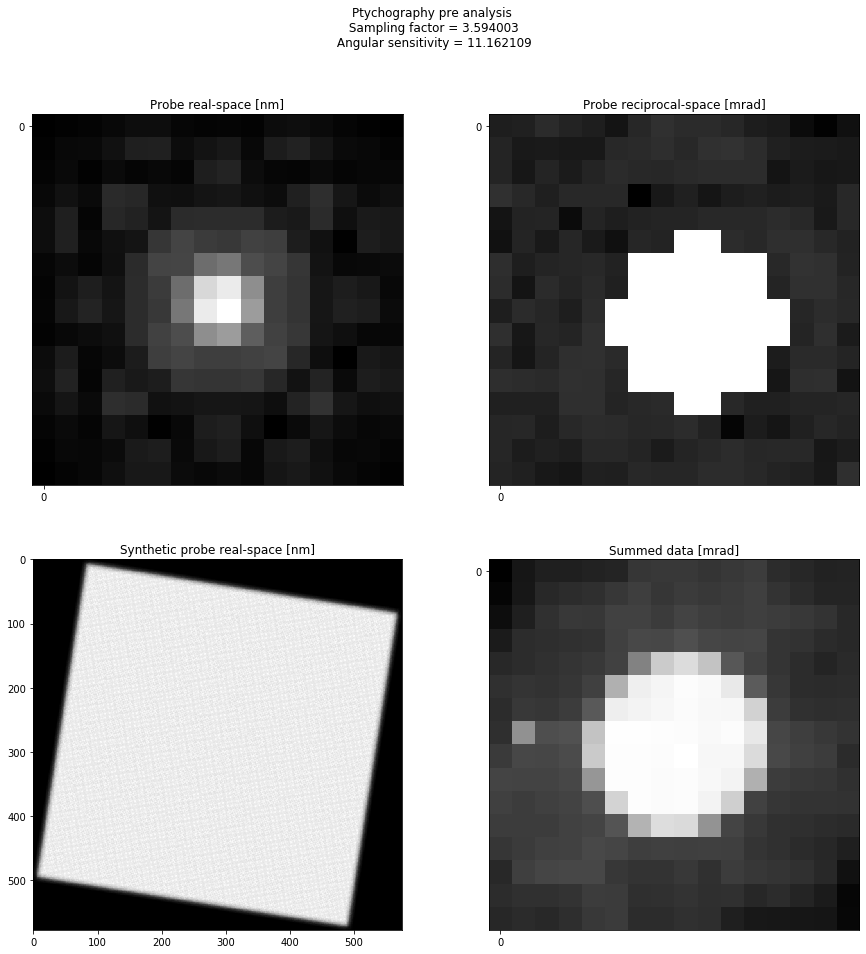

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,15])
angular_sensitivity = np.arctan(1/(probe_width/dx)) * (180/np.pi)
plt.suptitle('Ptychography pre analysis\n Sampling factor = %f\n Angular sensitivity = %f' %(s_factor,angular_sensitivity))
plt.gray()

ar_sz = probe.shape
d_theta = pty_model.detector.pp[0] / pty_model.detector.dist
print("d_theta", d_theta)
x_positions = np.arange(0,ar_sz[0],50)
x_labels = np.int32(x_positions * dx * 1e9)
plt.subplot(2,2,1)
plt.imshow(np.abs(probe))
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.title('Probe real-space [nm]')

x_positions = np.arange(0,ar_sz[0],50)
x_labels = np.int32(x_positions * d_theta * 1e3)
plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(probe)))))
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.title('Probe reciprocal-space [mrad]')

plt.subplot(2,2,3)
plt.title('Synthetic probe real-space [nm]')
plt.imshow(np.abs(s_probe))

data_sum = np.fft.fftshift(np.sum(pty_data.pro,(0)))
mask = (1-np.fft.fftshift(pty_model.detector.dead_pix))

plt.subplot(2,2,4)
data_im = np.log(data_sum)
data_im[data_sum==0] = 0
data_im *= mask
# pty_model.detector.dead_pix[pty_model.detector.dead_pix==True] = 1
# pty_model.detector.dead_pix[pty_model.detector.dead_pix==False] = 0
plt.imshow(data_im)
plt.xticks(x_positions, x_labels)
plt.yticks(x_positions, x_labels)
plt.title('Summed data [mrad]')
plt.show()

In [12]:
%matplotlib qt5
data_max = np.amax(pty_data.pro)
print(data_max)
pty_data.pro[pty_data.pro>(data_max-1)] = 0
data = np.reshape(np.fft.fftshift(pty_data.pro,(-2,-1)),[scan_n[0],scan_n[1],pty_data.pro.shape[-2],pty_data.pro.shape[-1]])
data = tb.bsx_times(data, mask)
data_sum = np.sum(data,(0,1))
#data_sum *= mask
ap = np.abs(ptyrex.core.toolbox.genAp(data.shape[-2:],20))
stxm_full = np.sum(data,(-2,-1))
stxm_bf = np.sum(ptyrex.core.toolbox.bsx_times(data, ap),(-2,-1))
stxm_df = np.sum(ptyrex.core.toolbox.bsx_times(data, (1-ap)),(-2,-1))

2020-06-16 13:25:34,815:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.


1562


2020-06-16 13:25:39,161:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:39,163:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])


Pixel size: [2.97153973e-10]


2020-06-16 13:25:39,956:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:39,958:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:39,960:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:39,961:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:39,963:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.492453476849385

2020-06-16 13:25:40,184:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 0.05
2020-06-16 13:25:40,185:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,186:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,187:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,187:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-16 13:25:40,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Roman.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:40,216:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,217:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,218:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-16 13:25:40,242:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:40,243:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:40,256:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:40,257:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-16 13:25:40,258:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-16 13:25:40,286:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,287:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,288:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,288:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:40,290:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-16 13:25:40,315:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,316:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,317:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,317:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Regular.otf) normal normal regular normal>) = 10.05
2020-06-16 13:25:40,318:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matp

2020-06-16 13:25:40,344:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-16 13:25:40,344:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-16 13:25:40,345:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-MediumItalic.ttf) italic normal medium normal>) = 11.145
2020-06-16 13:25:40,346:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-16 13:25:40,347:/dls_sw/apps/python/

2020-06-16 13:25:40,371:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000.
2020-06-16 13:25:40,373:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=STIXGeneral:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-16 13:25:40,374:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,374:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-

2020-06-16 13:25:40,398:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,399:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,400:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,400:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-16 13:25:40,402:/dls_sw/apps/python/anaconda/4.6.

2020-06-16 13:25:40,422:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,422:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,423:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,423:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:40,424:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3

2020-06-16 13:25:40,443:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 10.335
2020-06-16 13:25:40,443:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 11.25
2020-06-16 13:25:40,444:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,444:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-16 13:25:40,445:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-16 13:25:40,466:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,466:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,467:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 11.24
2020-06-16 13:25:40,467:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,468:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-16 13:25:40,487:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,487:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,488:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 11.145
2020-06-16 13:25:40,488:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,489:/dls_sw/apps/python/anaconda/4.6

2020-06-16 13:25:40,507:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,507:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,508:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-16 13:25:40,508:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,509:/dls_sw/apps/python/

2020-06-16 13:25:40,531:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.0
2020-06-16 13:25:40,532:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.335
2020-06-16 13:25:40,532:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.0
2020-06-16 13:25:40,533:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.0
2020-06-16 13:25:40,533:/dls_sw/apps/python/a

2020-06-16 13:25:40,551:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:40,551:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,552:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,552:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 0.33499999999999996
2020-06-16 13:25:40,553:/dls_sw/apps/python/anaconda

2020-06-16 13:25:40,569:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,570:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Roman.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:40,570:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,571:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,571:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-16 13:25:40,592:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:40,593:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:40,593:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:40,594:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-16 13:25:40,594:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-16 13:25:40,610:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,611:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,611:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,612:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:40,612:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-16 13:25:40,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,629:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,629:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Regular.otf) normal normal regular normal>) = 10.05
2020-06-16 13:25:40,630:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matp

2020-06-16 13:25:40,645:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-16 13:25:40,646:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-16 13:25:40,646:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-MediumItalic.ttf) italic normal medium normal>) = 11.145
2020-06-16 13:25:40,647:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-16 13:25:40,647:/dls_sw/apps/python/

2020-06-16 13:25:40,663:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=STIXNonUnicode:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXNonUnicode ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf') with score of 0.050000.
2020-06-16 13:25:40,668:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=STIXNonUnicode:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-16 13:25:40,668:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,669:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3

2020-06-16 13:25:40,684:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,685:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,685:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,686:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-16 13:25:40,686:/dls_sw/apps/python/anaconda/4.6.

2020-06-16 13:25:40,702:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,702:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,702:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,703:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:40,703:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3

2020-06-16 13:25:40,719:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 10.335
2020-06-16 13:25:40,719:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 11.25
2020-06-16 13:25:40,720:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,720:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-16 13:25:40,721:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-16 13:25:40,736:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,736:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light.ttf) normal normal light normal>) = 11.24
2020-06-16 13:25:40,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:40,738:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-16 13:25:40,753:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,754:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 11.05
2020-06-16 13:25:40,754:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Regular.otf) normal normal roman normal>) = 11.145
2020-06-16 13:25:40,755:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Malayalam' (Lohit-Malayalam.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,755:/dls_sw/apps/python/anaconda/4.6

2020-06-16 13:25:40,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,772:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-16 13:25:40,772:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Regular.otf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:40,773:/dls_sw/apps/python/

2020-06-16 13:25:40,806:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.335
2020-06-16 13:25:40,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.0
2020-06-16 13:25:40,808:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 1.335
2020-06-16 13:25:40,809:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 1.0
2020-06-16 13:25:40,810:/dls_sw/apps/python/anaconda/4.6.14/6

2020-06-16 13:25:40,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:40,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,842:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,842:/dls_sw/apps/

2020-06-16 13:25:40,867:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-16 13:25:40,867:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS56F.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:40,868:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:40,869:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,870:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/

2020-06-16 13:25:40,893:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,893:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS System' (KhmerOS_sys.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,894:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 10.05
2020-06-16 13:25:40,895:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
2020-06-16 13:25:40,895:/dls_sw/apps/python/anacond

2020-06-16 13:25:40,917:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 10.525
2020-06-16 13:25:40,917:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-16 13:25:40,918:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:40,919:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:40,919:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-16 13:25:40,942:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,943:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,944:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 11.24
2020-06-16 13:25:40,945:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:40,946:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-16 13:25:40,977:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 11.535
2020-06-16 13:25:40,978:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,979:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,980:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:40,981:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-16 13:25:41,022:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:41,023:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-16 13:25:41,024:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-16 13:25:41,025:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,026:/dls_sw/apps/python/anaconda/4.6.14/6

2020-06-16 13:25:41,064:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,064:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,065:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,066:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,067:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplo

2020-06-16 13:25:41,088:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 11.25
2020-06-16 13:25:41,088:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-BoldOblique.otf) oblique normal bold condensed>) = 11.535
2020-06-16 13:25:41,089:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk-bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,090:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,090:/dls_sw/apps/pyth

2020-06-16 13:25:41,109:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,110:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 10.145
2020-06-16 13:25:41,110:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-RegularOblique.ttf) oblique normal regular normal>) = 11.05
2020-06-16 13:25:41,111:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:41,111:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-16 13:25:41,129:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,130:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,130:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-DemiItalic.otf) italic normal book normal>) = 11.05
2020-06-16 13:25:41,131:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight Italic.ttf) italic normal light normal>) = 11.24
2020-06-16 13:25:41,131:/dls_sw/apps/python/anaconda/4.6.14/64/envs/

2020-06-16 13:25:41,147:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:41,148:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
2020-06-16 13:25:41,148:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-SemiboldItalic.ttf) italic normal semibold normal>) = 11.24
2020-06-16 13:25:41,149:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,149:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-16 13:25:41,166:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,166:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,167:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:41,167:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Sefarad CLM' (StamSefaradCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,168:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-16 13:25:41,192:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 11.145
2020-06-16 13:25:41,192:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,193:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-16 13:25:41,193:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,193:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-16 13:25:41,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,216:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,216:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,217:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-16 13:25:41,232:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
2020-06-16 13:25:41,233:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,233:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,234:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,234:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-16 13:25:41,249:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,250:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-16 13:25:41,250:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,251:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,251:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-16 13:25:41,267:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light-Italic.ttf) italic normal light normal>) = 11.24
2020-06-16 13:25:41,267:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,268:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,268:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:41,269:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-16 13:25:41,283:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,284:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,284:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,285:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,285:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-16 13:25:41,301:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,301:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,302:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:41,302:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,303:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site

2020-06-16 13:25:41,318:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:41,318:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,319:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,319:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-16 13:25:41,320:/dls_sw/apps/python/anaconda/4.6.14/

2020-06-16 13:25:41,335:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,336:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,336:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,337:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,337:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-16 13:25:41,352:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,353:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,353:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,354:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,354:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-16 13:25:41,370:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-16 13:25:41,370:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:41,371:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,371:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,371:/dls_sw/apps/py

2020-06-16 13:25:41,386:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:41,387:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:41,388:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,388:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-16 13:25:41,389:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-16 13:25:41,424:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal bold condensed>) = 10.535
2020-06-16 13:25:41,424:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,425:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-16 13:25:41,425:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:41,426:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-16 13:25:41,441:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,442:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:41,442:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,442:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,443:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-16 13:25:41,459:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,459:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,460:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,460:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,461:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-16 13:25:41,476:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,477:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,477:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,477:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:41,478:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-16 13:25:41,493:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,494:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,494:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-16 13:25:41,495:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,495:/dls_sw/apps/python/anaconda/4.6.14/64/envs/

2020-06-16 13:25:41,510:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,511:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-16 13:25:41,511:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,512:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,512:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-16 13:25:41,527:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-16 13:25:41,528:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,528:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,529:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,529:/dls_sw/apps/p

2020-06-16 13:25:41,544:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,545:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-16 13:25:41,545:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,546:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,546:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packag

2020-06-16 13:25:41,561:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,562:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,562:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,563:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,563:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-16 13:25:41,597:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,598:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,598:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,599:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,599:/dls_sw/apps/python/anacon

2020-06-16 13:25:41,615:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,615:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,616:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,616:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,617:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-16 13:25:41,632:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,633:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
2020-06-16 13:25:41,633:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,634:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,634:/dls_sw/apps/

2020-06-16 13:25:41,651:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,651:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,652:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,652:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,653:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/si

2020-06-16 13:25:41,668:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 11.24
2020-06-16 13:25:41,669:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,669:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 10.535
2020-06-16 13:25:41,670:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,670:/dls_sw/apps/python/anaconda/4

2020-06-16 13:25:41,700:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,701:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,702:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,702:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,703:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-16 13:25:41,722:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-16 13:25:41,723:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,723:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,724:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 11.05
2020-06-16 13:25:41,724:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-16 13:25:41,748:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,748:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:41,749:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,749:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,750:/dls_sw/apps/python/anaconda/4.6.14

2020-06-16 13:25:41,768:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,768:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,769:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:41,769:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,770:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/sit

2020-06-16 13:25:41,793:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-16 13:25:41,794:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,794:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,795:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,796:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/p

2020-06-16 13:25:41,813:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight Italic.ttf) italic normal light normal>) = 11.24
2020-06-16 13:25:41,813:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,814:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,814:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-16 13:25:41,815:/dls_sw/apps/python/anaconda/4.6

2020-06-16 13:25:41,832:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,832:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,833:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 11.25
2020-06-16 13:25:41,833:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:41,834:/dls_sw/apps/python/a

2020-06-16 13:25:41,850:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Sefarad CLM' (StamSefaradCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,850:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,851:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,852:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,852:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-package

2020-06-16 13:25:41,868:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,868:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-16 13:25:41,869:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,869:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PakType Naskh Basic' (PakTypeNaskhBasic.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,870:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-16 13:25:41,897:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,897:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:41,898:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,898:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,899:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-16 13:25:41,915:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,915:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,916:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Roman.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:41,916:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,917:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-16 13:25:41,933:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,933:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:41,934:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,934:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:41,935:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-16 13:25:41,951:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:41,951:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:41,952:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,952:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,952:/dls_sw/apps/python/anaconda/

2020-06-16 13:25:41,968:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,968:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,969:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:41,969:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,970:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-16 13:25:41,986:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:41,986:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-16 13:25:41,987:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-16 13:25:41,987:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-MediumItalic.ttf) italic normal medium normal>) = 11.145
2020-06-16 13:25:41,988:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-16 13:25:42,004:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:42,004:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-16 13:25:42,005:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000.
2020-06-16 13:25:42,014:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:

2020-06-16 13:25:42,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:42,039:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,040:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,041:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:42,041:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-16 13:25:42,653:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:42,654:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:42,655:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:42,655:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:42,656:/dls_sw/apps/python/anaconda/4.6.

2020-06-16 13:25:42,674:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:42,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:42,676:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 0.5349999999999999
2020-06-16 13:25:42,676:/dls_sw/apps/python/

2020-06-16 13:25:42,692:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,693:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:42,693:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:42,694:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,694:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-16 13:25:42,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:42,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:42,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:42,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 10.525
2020-06-16 13:25:42,713:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-16 13:25:42,728:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,728:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:42,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,737:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:42,738:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-16 13:25:42,763:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,764:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-16 13:25:42,765:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,765:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 1.535
2020-06-16 13:25:42,766:/dls_sw/apps/python/anaconda/4.

2020-06-16 13:25:42,790:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,791:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,791:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:42,792:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:42,793:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-16 13:25:42,815:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:42,815:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:42,816:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 0.43499999999999994
2020-06-16 13:25:42,817:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:42,818:/dls_sw/apps/python/anaconda/4.6.

2020-06-16 13:25:42,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-16 13:25:42,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:42,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:42,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 10.35
2020-06-16 13:25:42,842:/dls_

2020-06-16 13:25:42,864:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:42,864:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:42,865:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 10.145
2020-06-16 13:25:42,865:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:42,866:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-16 13:25:42,884:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:42,885:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:42,886:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 10.15
2020-06-16 13:25:42,886:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:42,887:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-16 13:25:42,905:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-16 13:25:42,905:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-16 13:25:42,906:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 11.05
2020-06-16 13:25:42,906:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 11.24
2020-06-16 13:25:42,907:/dls_sw/apps/python/anaconda

2020-06-16 13:25:42,924:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-16 13:25:42,924:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:42,925:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-16 13:25:42,925:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:42,926:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-16 13:25:42,942:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-16 13:25:42,943:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 10.15
2020-06-16 13:25:42,943:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-16 13:25:42,944:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 10.145
2020-06-16 13:25:42,944:/dls_sw/apps/python/anaconda/4.6

2020-06-16 13:25:42,971:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.335
2020-06-16 13:25:42,972:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
2020-06-16 13:25:42,972:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.0
2020-06-16 13:25:42,973:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.335
2020-06-16 13:25:42,973:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-16 13:25:42,991:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,991:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:42,992:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:42,992:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:42,993:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-16 13:25:43,018:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:43,019:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:43,020:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Roman.otf) normal normal roman normal>) = 10.145
2020-06-16 13:25:43,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/si

2020-06-16 13:25:43,043:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,044:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,045:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:43,046:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:43,047:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-p

2020-06-16 13:25:43,067:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,068:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-16 13:25:43,068:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,069:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,070:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-16 13:25:43,087:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,088:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,088:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,089:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'OpenSymbol' (opens___.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,090:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-16 13:25:43,108:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:43,108:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,109:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-16 13:25:43,109:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Light.otf) normal normal light normal>) = 10.24
2020-06-16 13:25:43,110:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-16 13:25:43,127:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,128:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-16 13:25:43,128:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-16 13:25:43,129:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=DejaVu Sans Mono:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans Mono ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyt

2020-06-16 13:25:43,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:43,157:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,158:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,158:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/p

2020-06-16 13:25:43,182:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,183:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,184:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,185:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,185:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-16 13:25:43,212:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:43,213:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,216:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-16 13:25:43,241:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:43,242:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,243:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-16 13:25:43,244:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,244:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-16 13:25:43,268:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,269:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-16 13:25:43,269:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-16 13:25:43,270:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-16 13:25:43,271:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-16 13:25:43,292:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-16 13:25:43,293:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-16 13:25:43,294:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-16 13:25:43,294:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-16 13:25:43,295:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-16 13:25:43,493:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:43,495:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:43,496:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e

2020-06-16 13:25:44,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06,
       2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07, 8.e+07, 9.e+07,
       2.e+08, 3.e+08, 4.e+08, 5.e+08, 6.e+08, 7.e+08, 8.e+08, 9.e+08])
2020-06-16 13:25:44,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-16 13:25:46,555:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:46,556:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:46,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:46,560:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:46,562:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.492453476849385

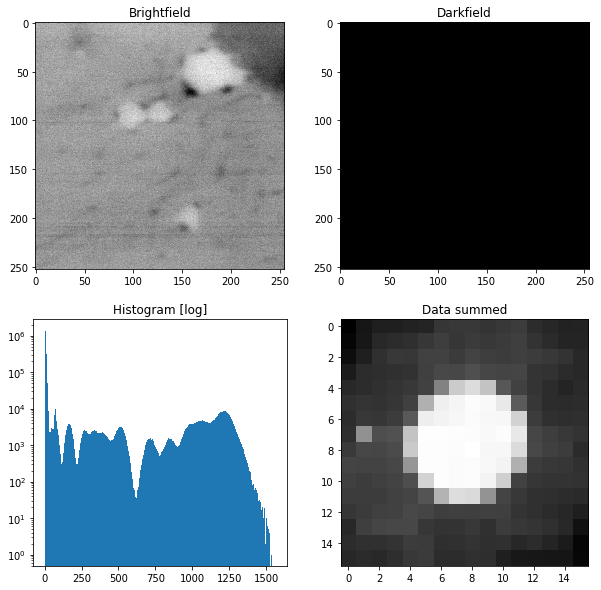

2020-06-16 13:25:48,398:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:48,399:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:48,401:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.49245347684938584 vmax 2886227.97242369
2020-06-16 13:25:48,402:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2354:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08])
2020-06-16 13:25:48,404:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/ticker.py:2303:vmin 0.492453476849385

In [13]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.title('Brightfield')
plt.imshow(stxm_bf)
plt.subplot(2,2,2)
plt.title('Darkfield')
plt.imshow(stxm_df)
plt.subplot(2,2,3)
plt.title('Histogram [log]')
plt.hist(data.flatten(),bins=np.amax(data))
plt.yscale('log')
plt.subplot(2,2,4)
plt.title('Data summed')
plt.imshow(np.log(data_sum))
plt.show()

print("Pixel size:", scan_dr)